In [12]:
# %pip install -r requirements.txt

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")

In [14]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [15]:
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [16]:
random_state = 42

# Handling Missing Values

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

No missing values

# Handling Duplicate Values

In [18]:
train_df.duplicated().sum()

np.int64(0)


No duplicate values

# Looking at column distributions

In [19]:
categorical_columns = [
    "Marital status",
    "Application mode",
    "Application order",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
]

numerical_columns = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP",
]

## Looking at distributions for numerical columns

In [20]:
# for column in numerical_columns:
#     print(column)
#     # Calculate the IQR (Interquartile Range)
#     Q1 = train_df[column].quantile(0.25)
#     Q3 = train_df[column].quantile(0.75)
#     IQR = Q3 - Q1

#     # Calculate the bin width using Freedman-Diaconis rule
#     bin_width = 2 * IQR * (len(train_df[column]) ** (-1/3))

#     # Determine the number of bins
#     num_bins = int((train_df[column].max() - train_df[column].min()) / bin_width)
#     plt.hist(train_df[column], bins=num_bins)
#     plt.title(column)
#     plt.show()

#     sns.boxplot(data=train_df, x=column, hue="Target")
#     plt.title(f"{column} per class")
#     plt.show()


## Looking at distribution of categorical columns

Marital status


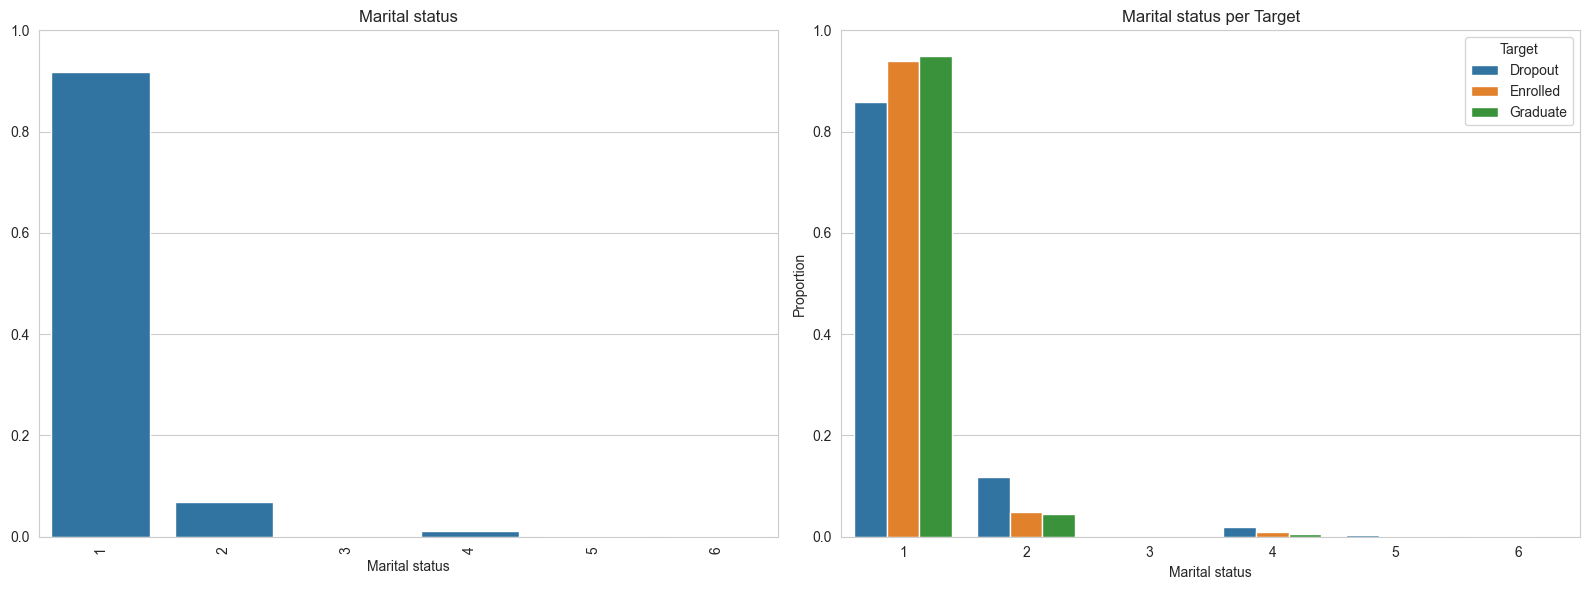

Application mode


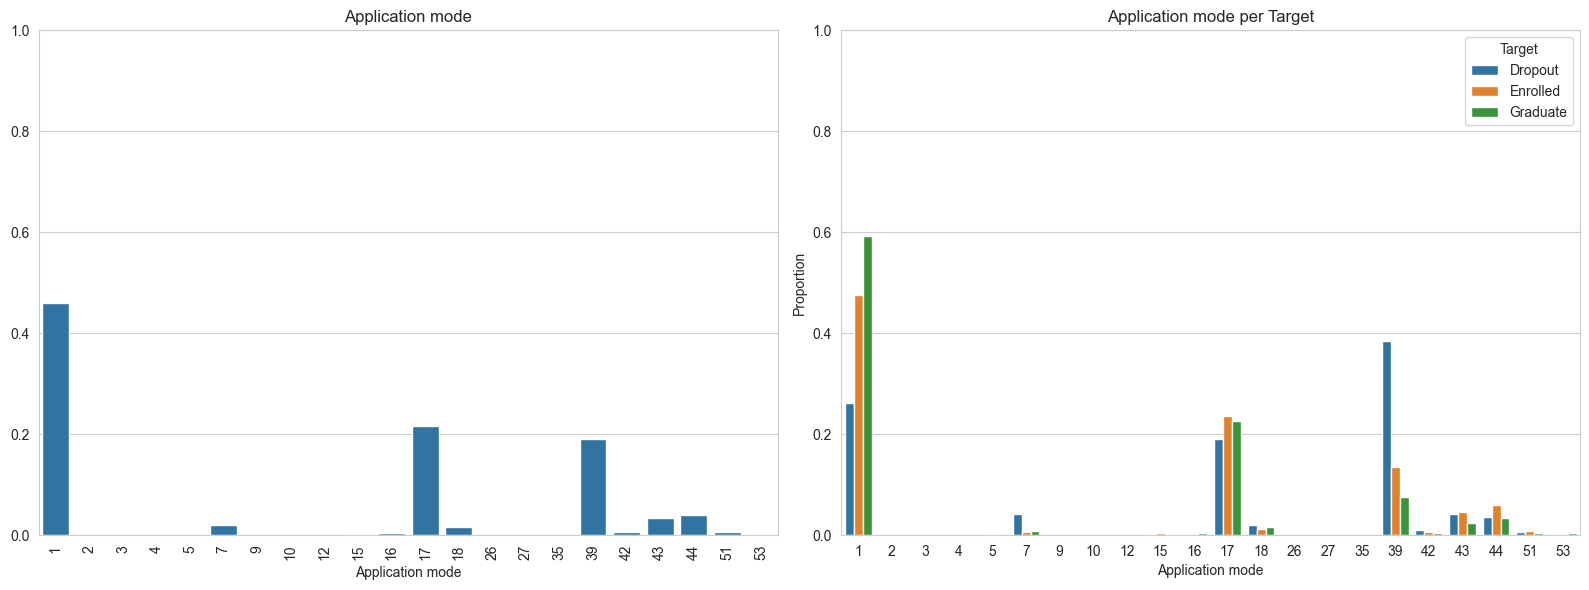

Application order


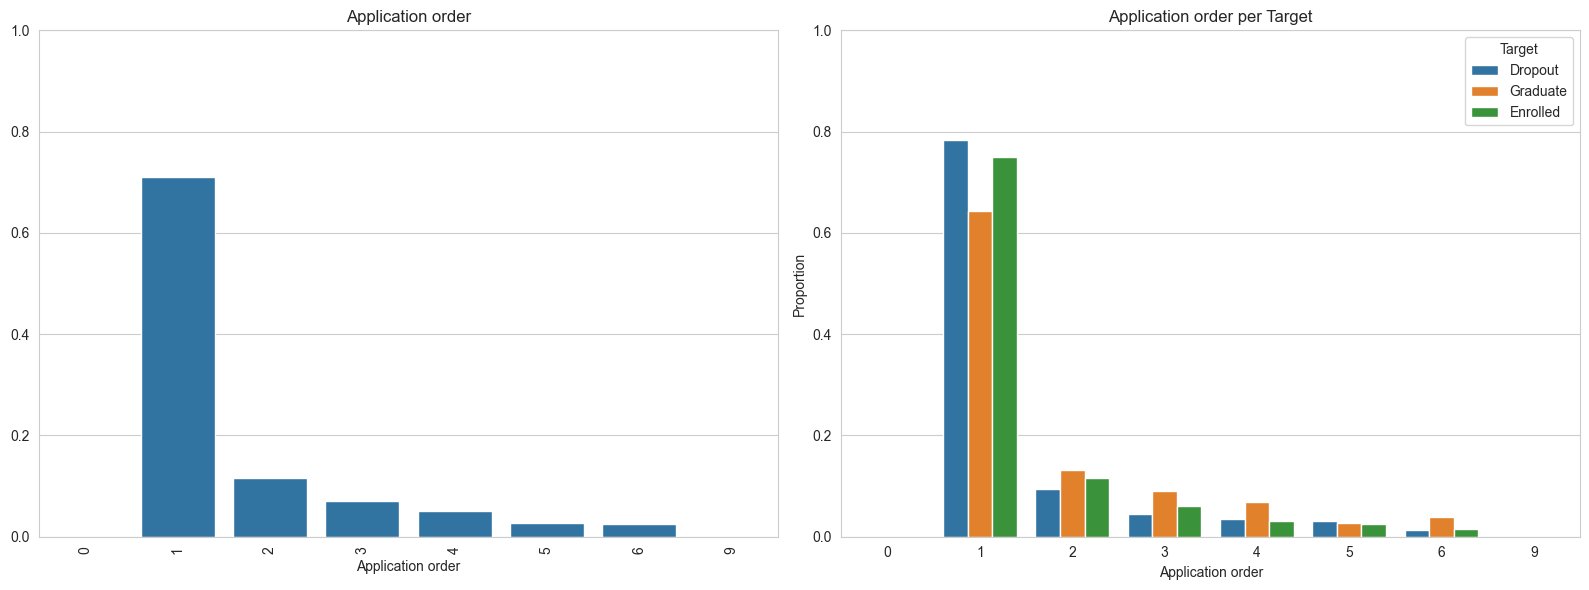

Course


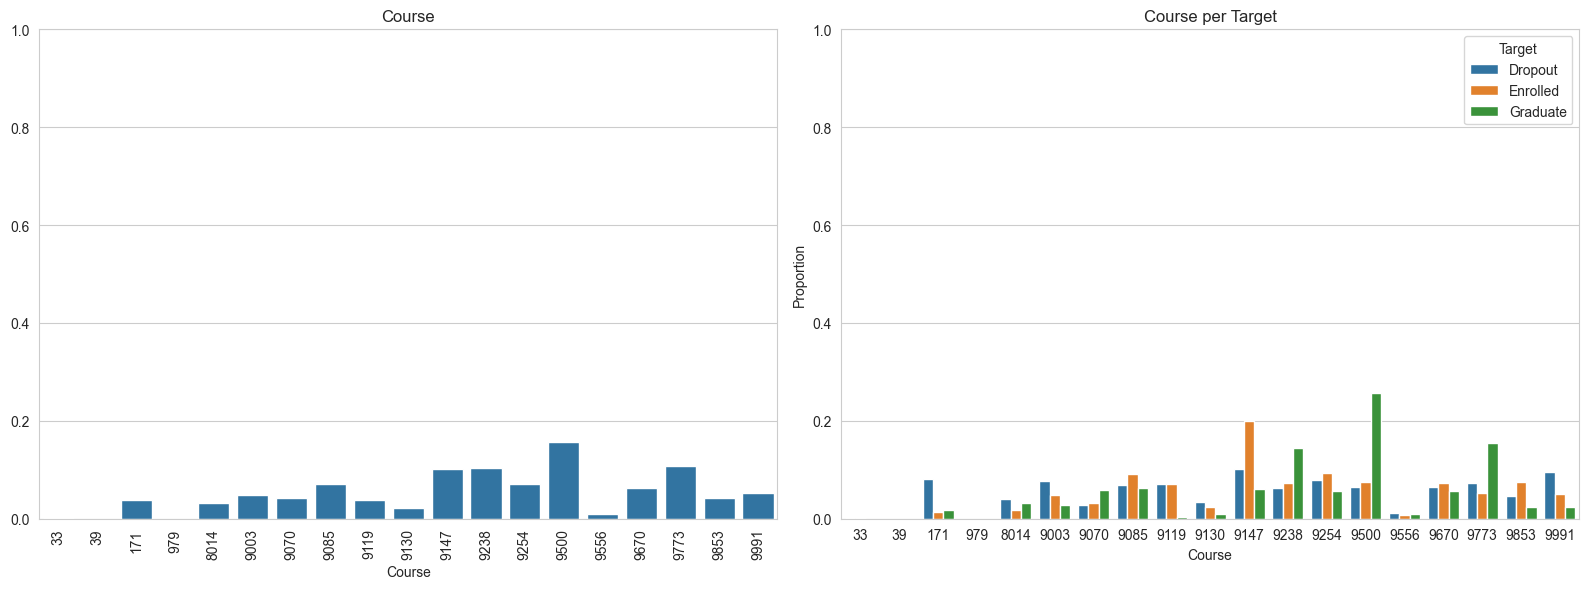

Daytime/evening attendance


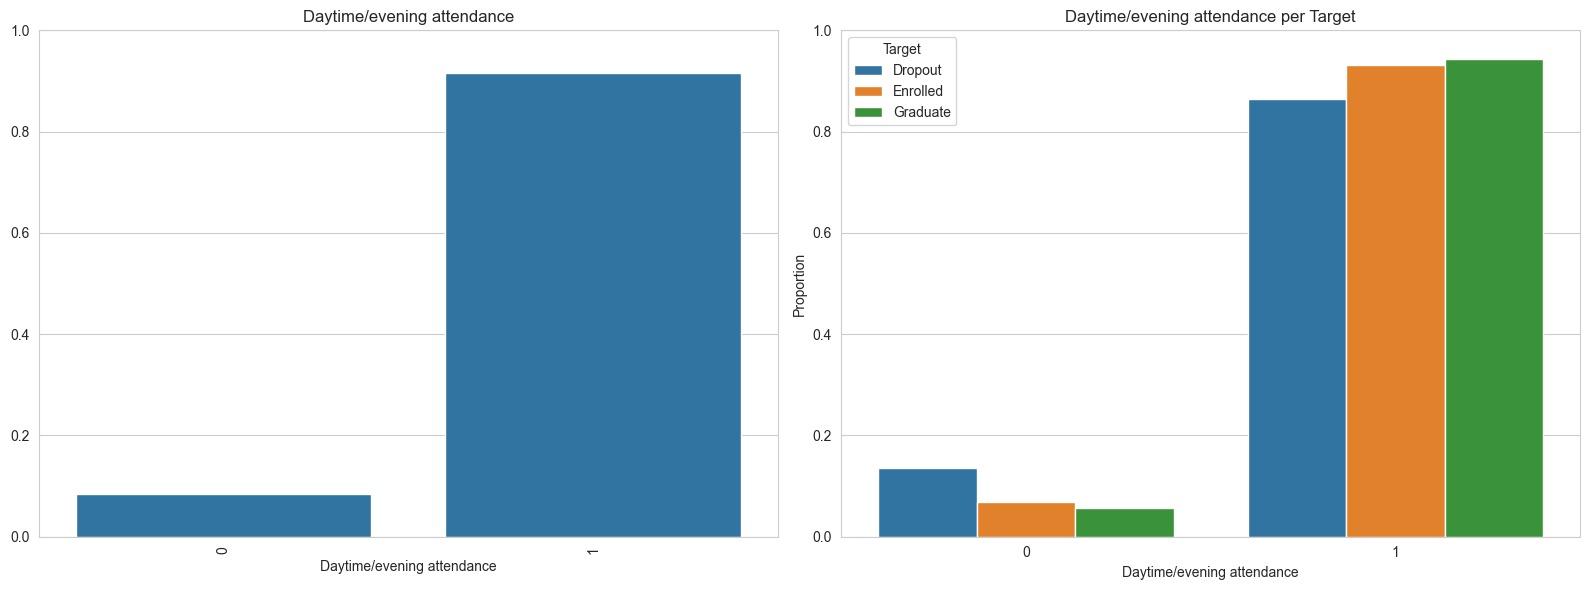

Previous qualification


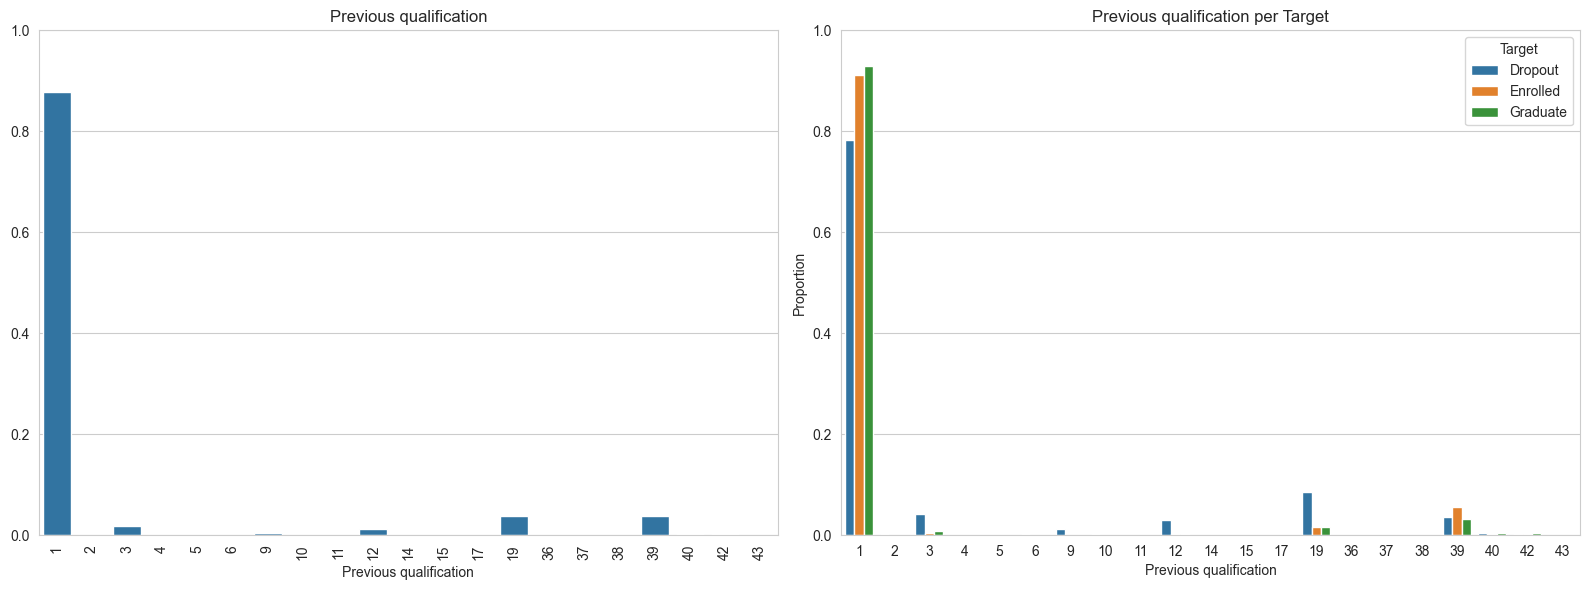

Nacionality


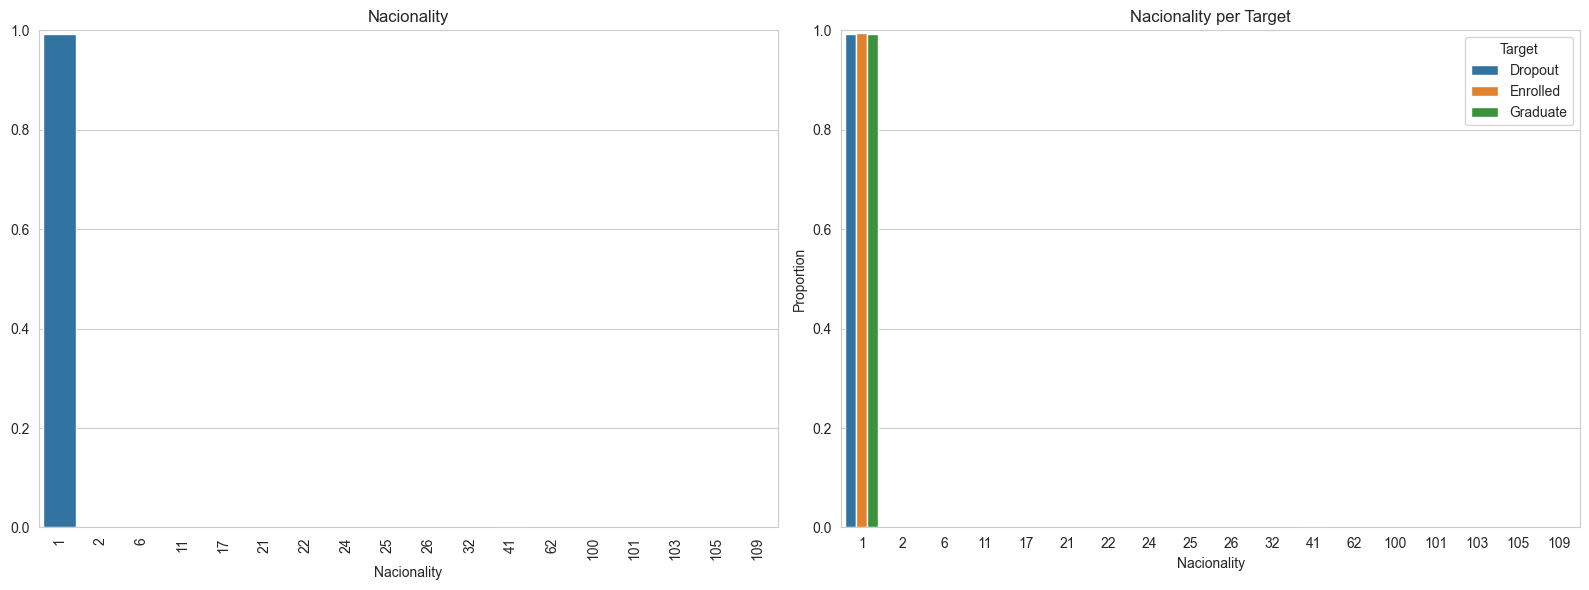

Mother's qualification


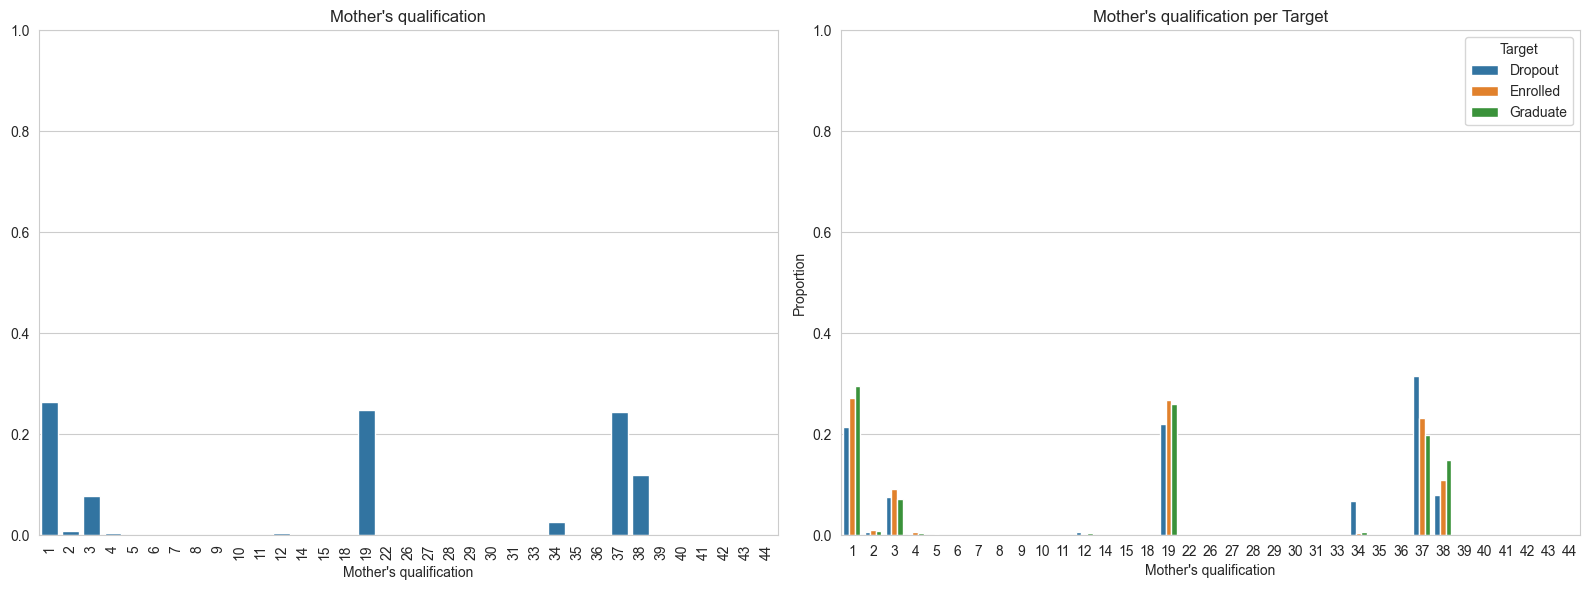

Father's qualification


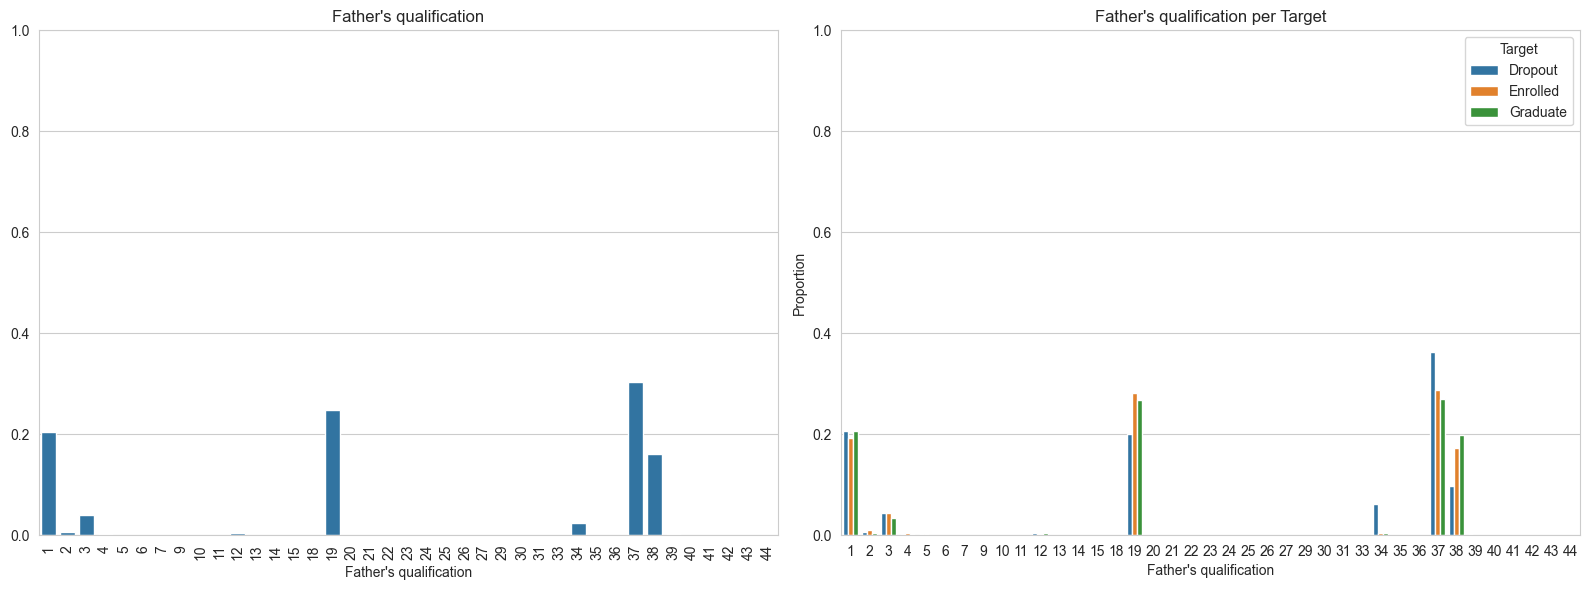

Mother's occupation


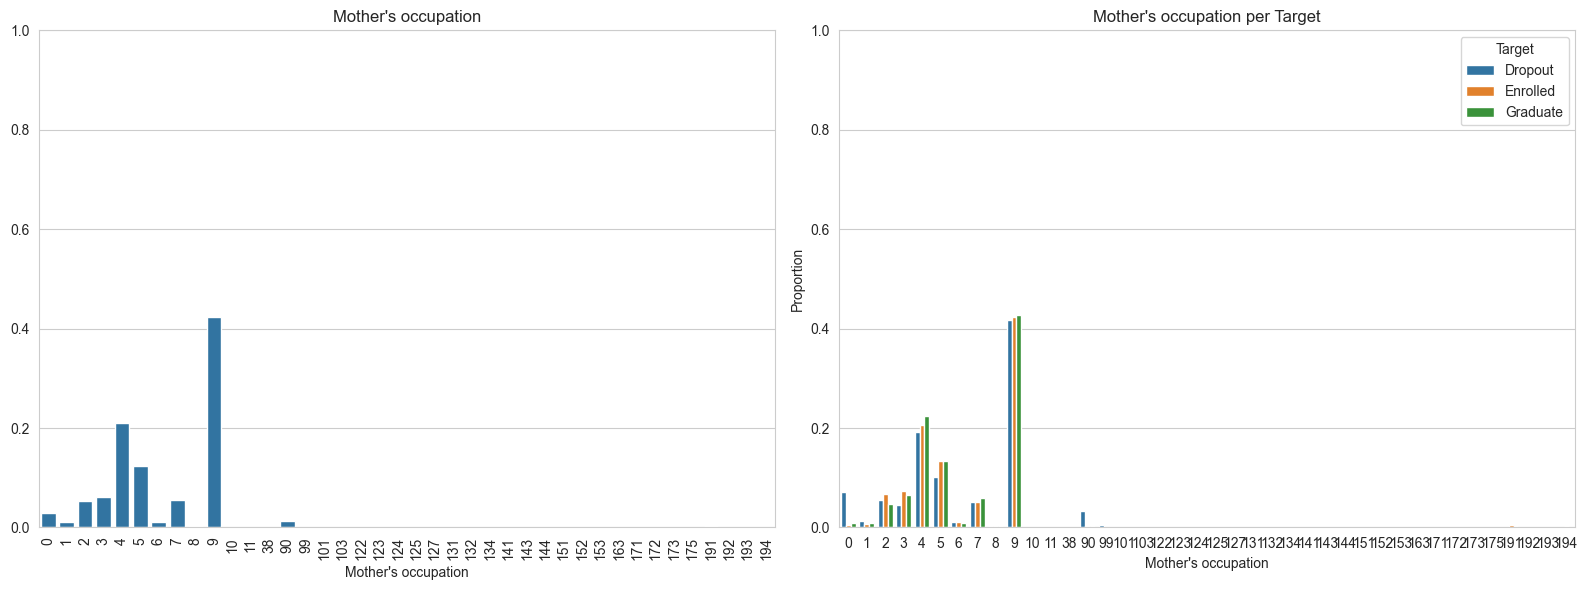

Father's occupation


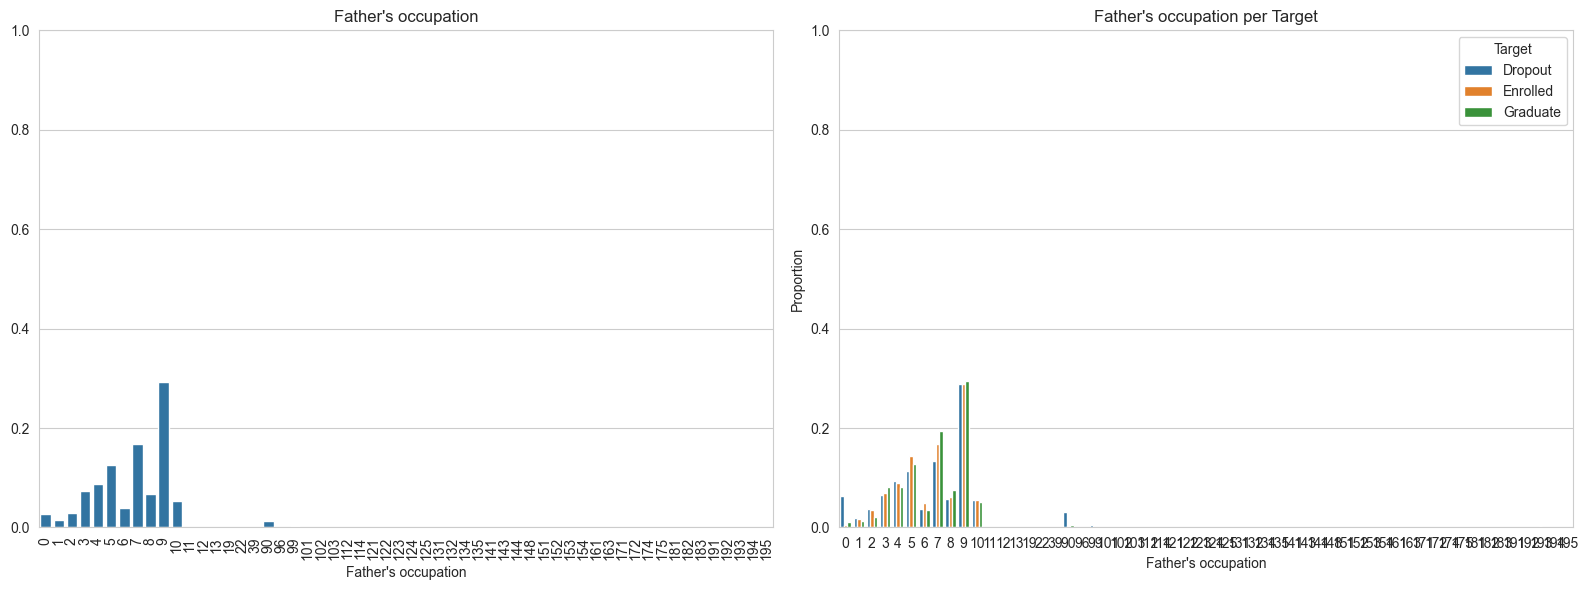

Displaced


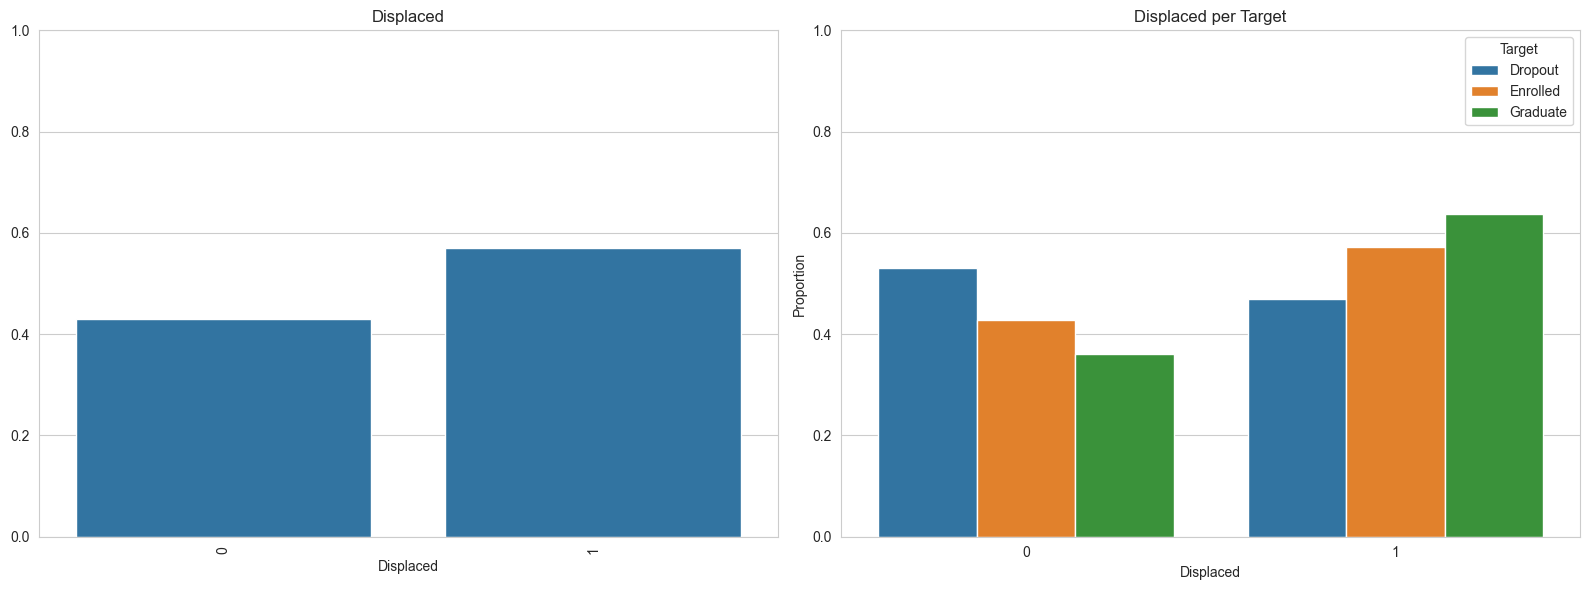

Educational special needs


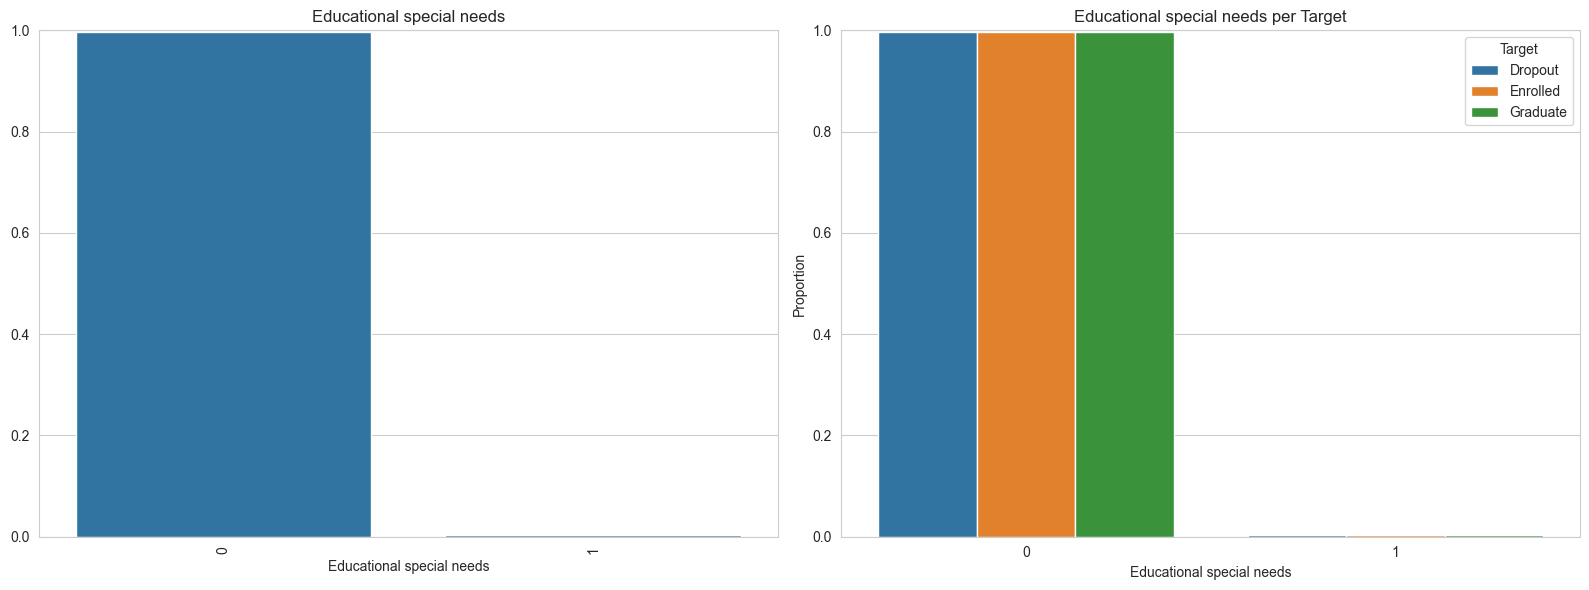

Debtor


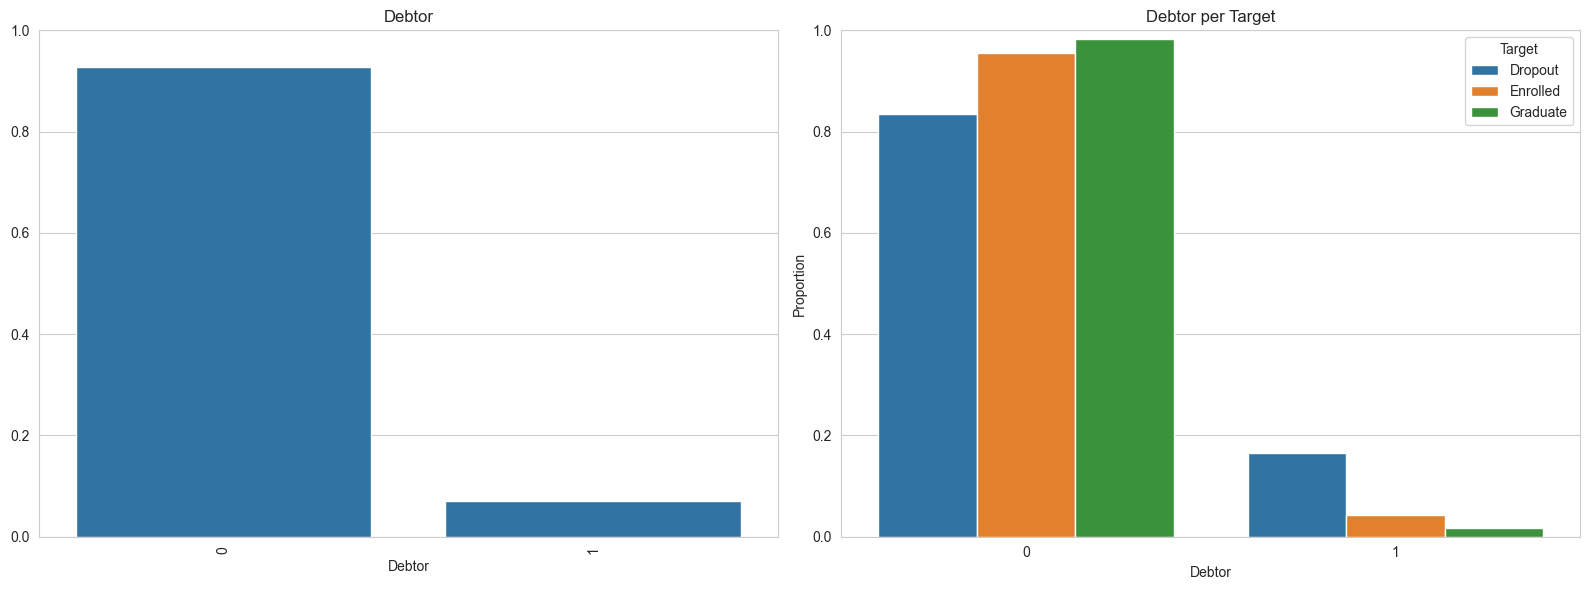

Tuition fees up to date


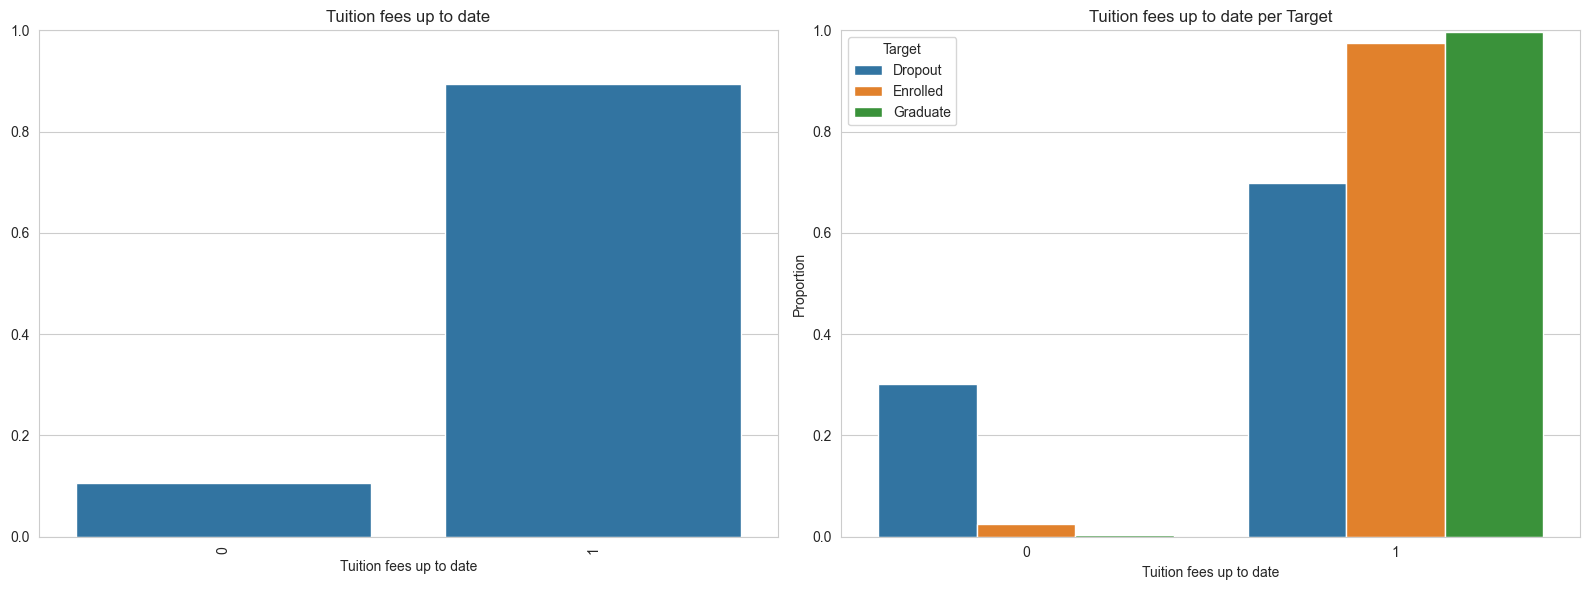

Gender


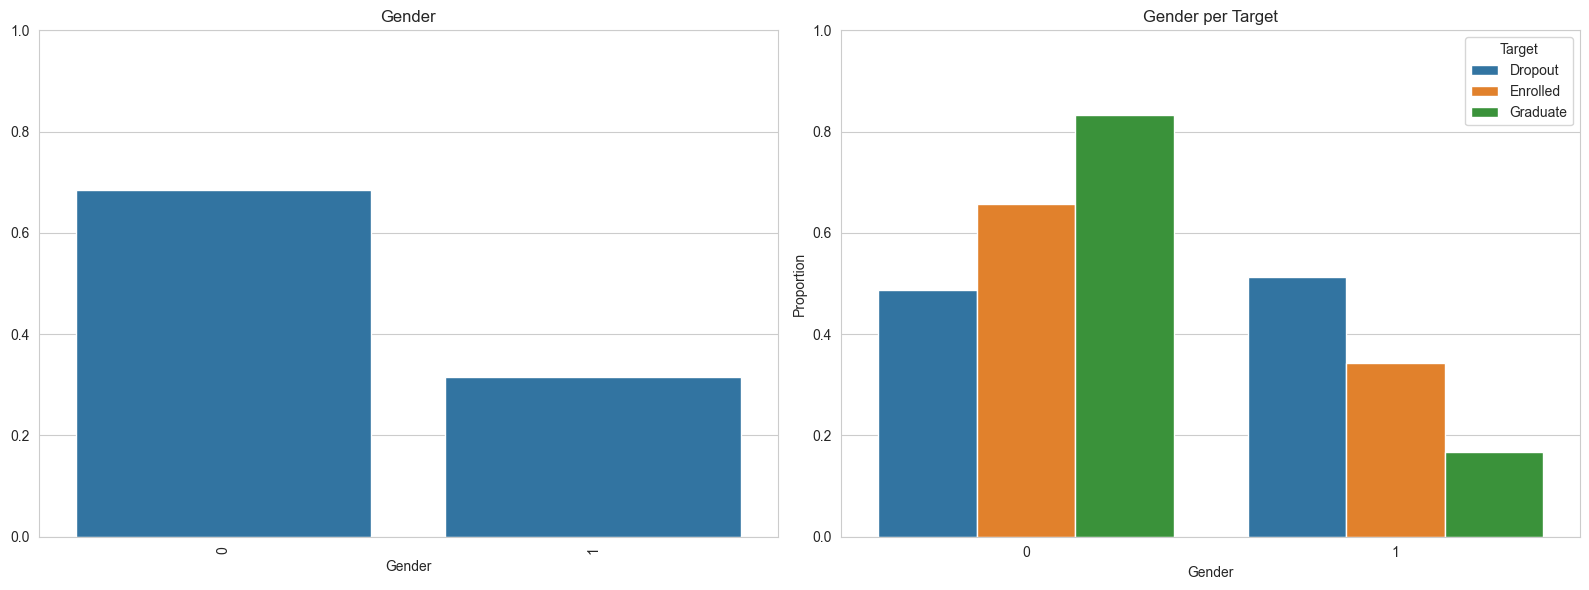

Scholarship holder


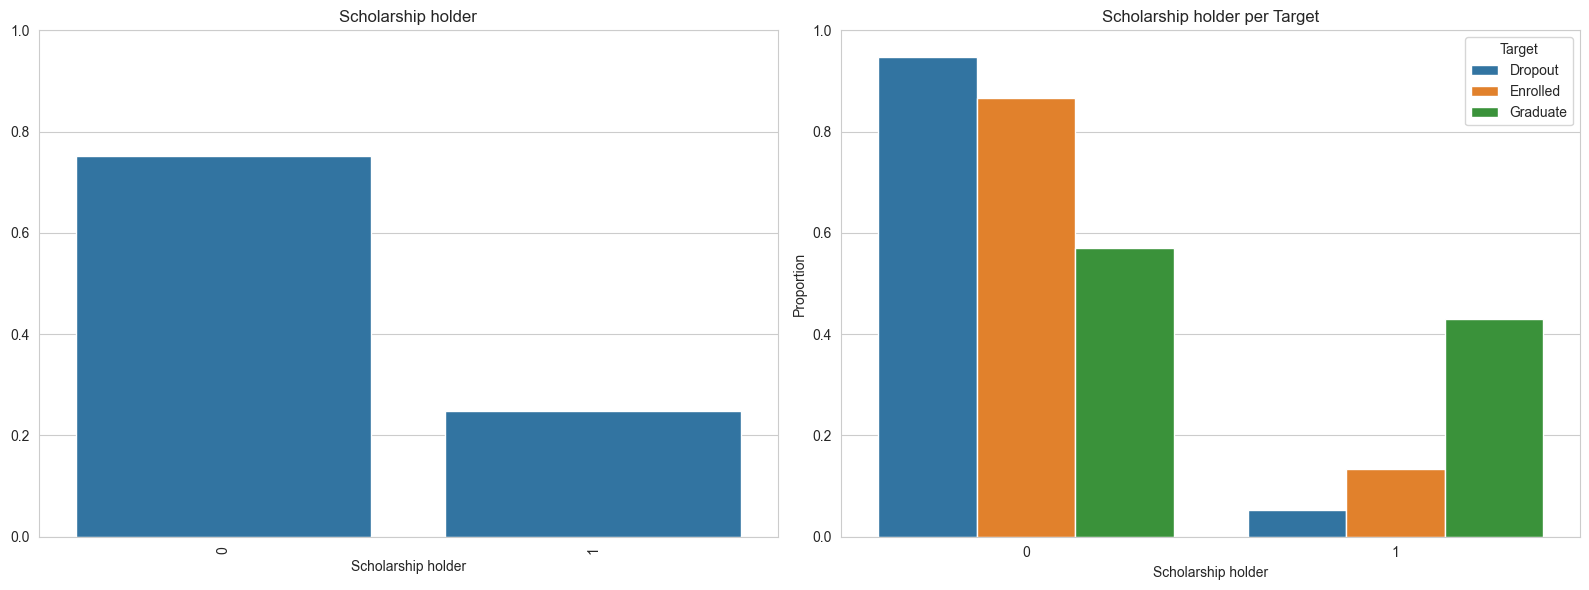

International


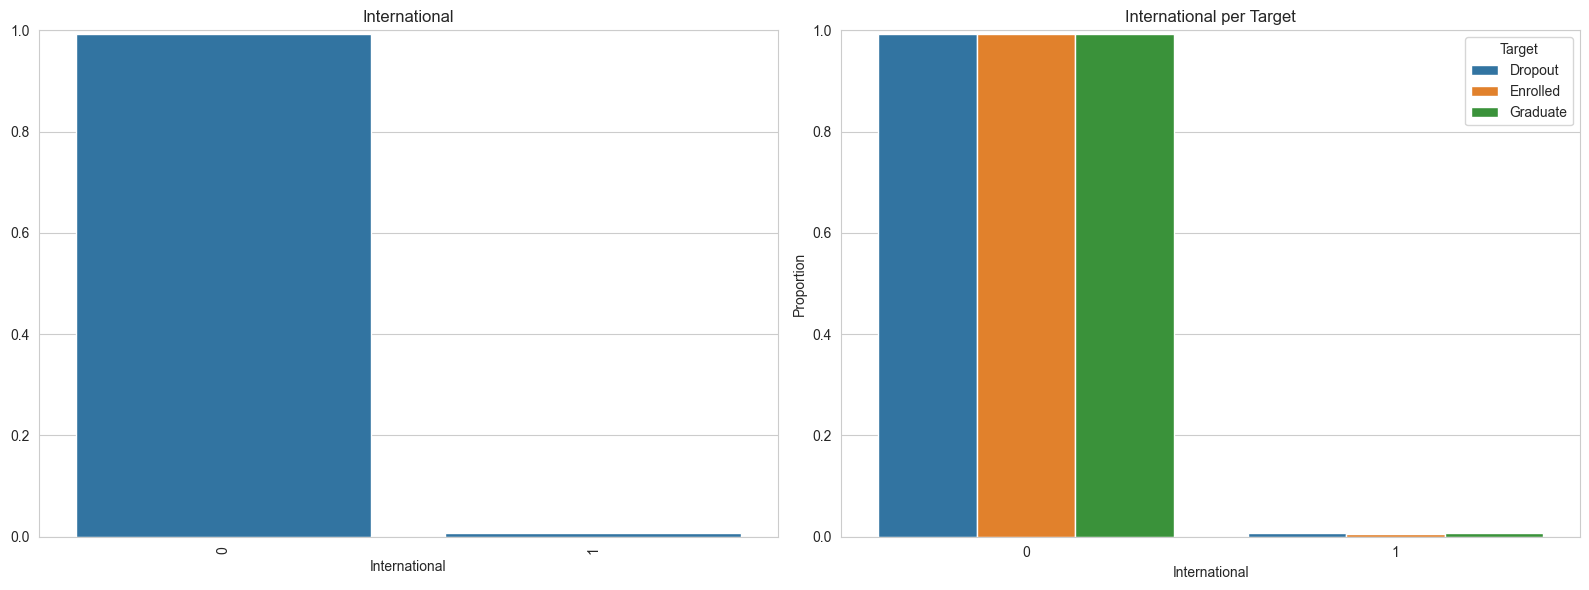

Curricular units 1st sem (credited)


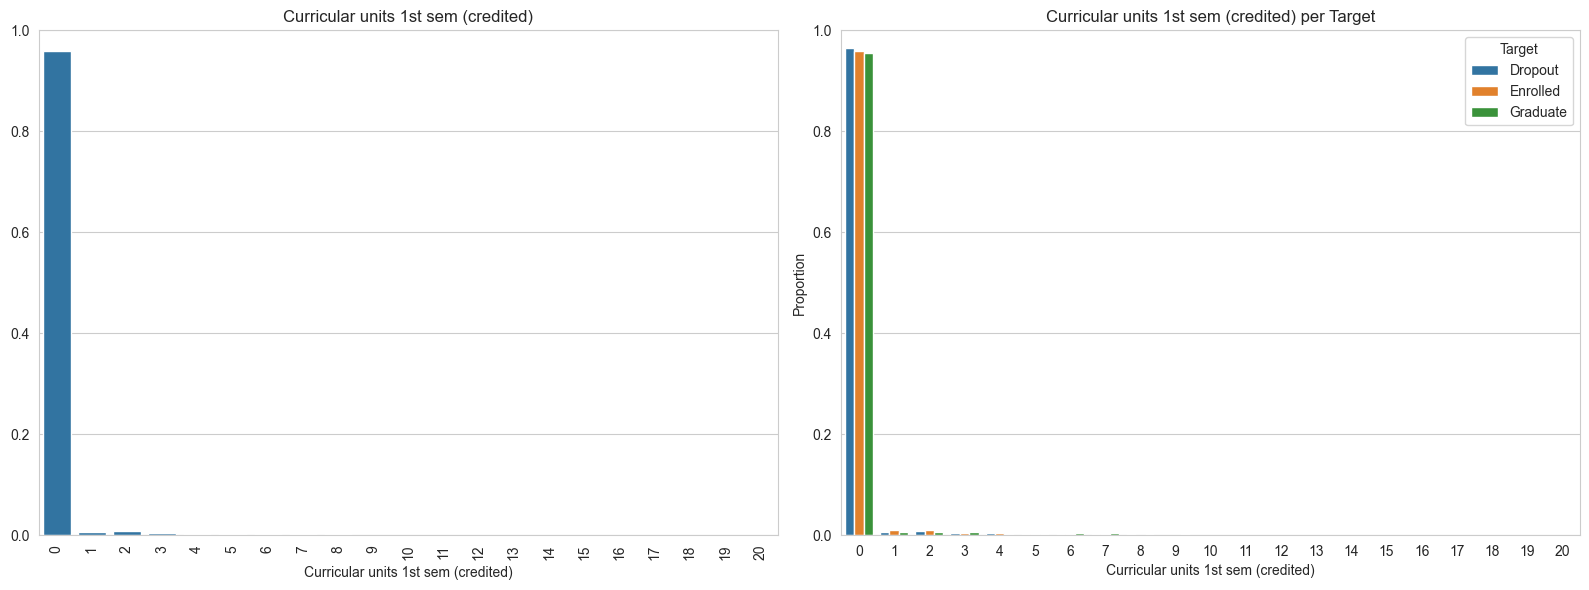

Curricular units 1st sem (enrolled)


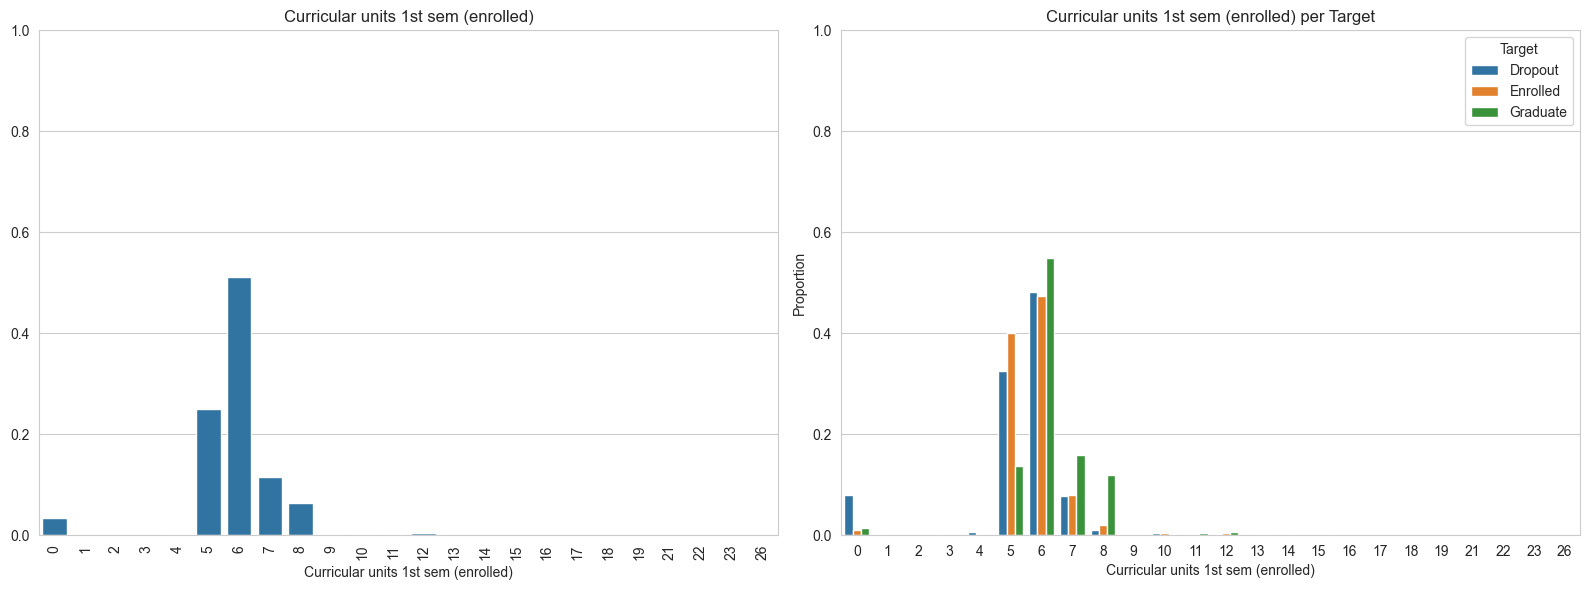

Curricular units 1st sem (evaluations)


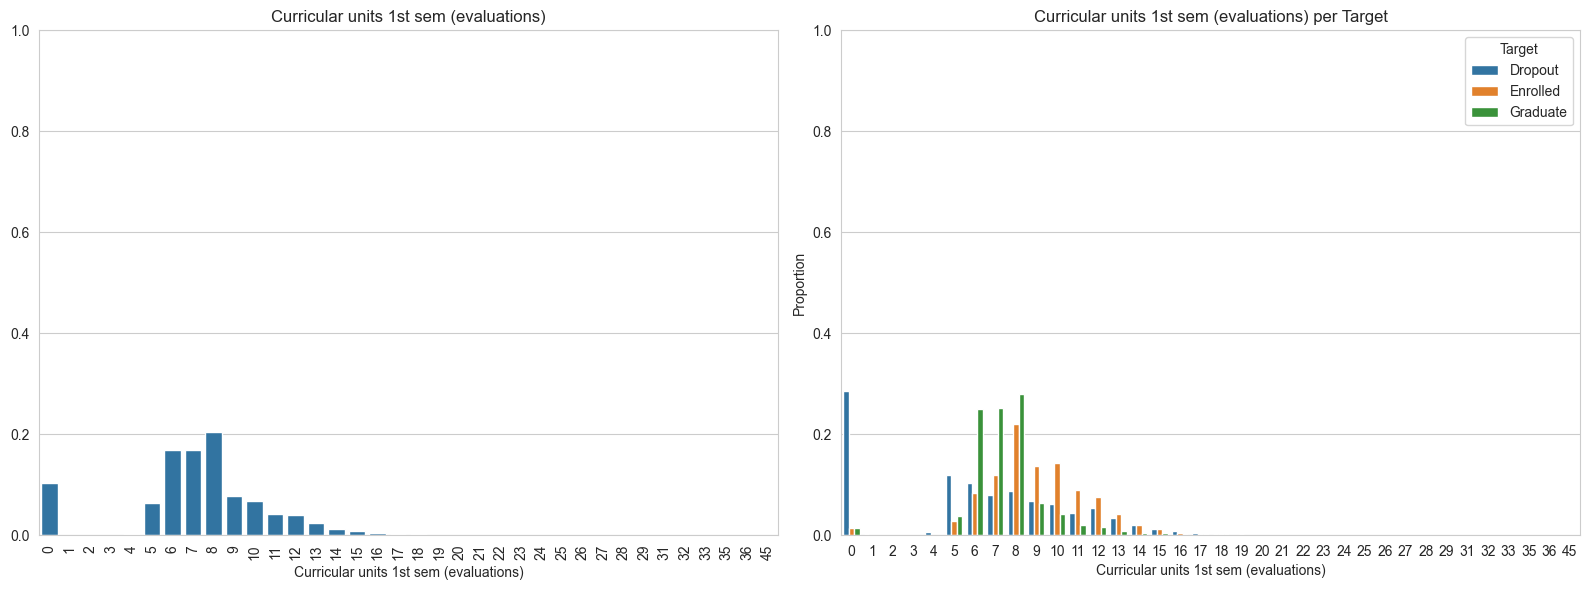

Curricular units 1st sem (approved)


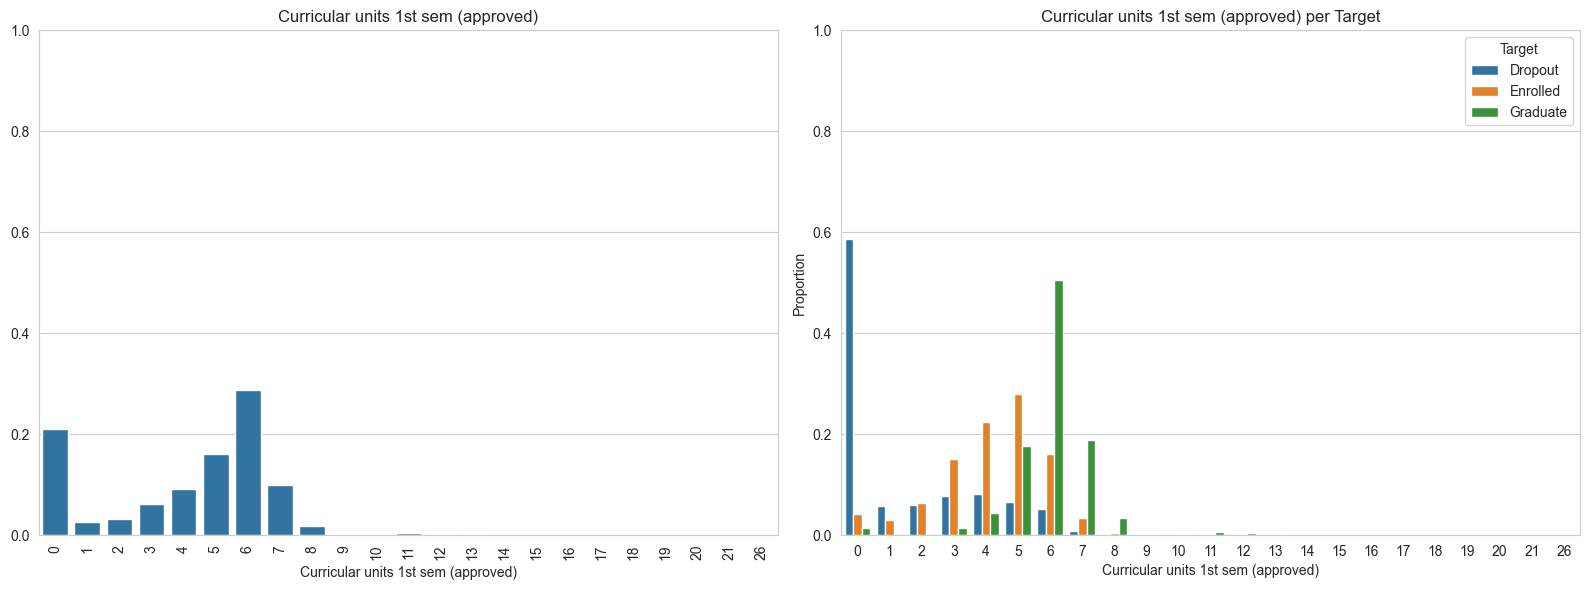

Curricular units 1st sem (without evaluations)


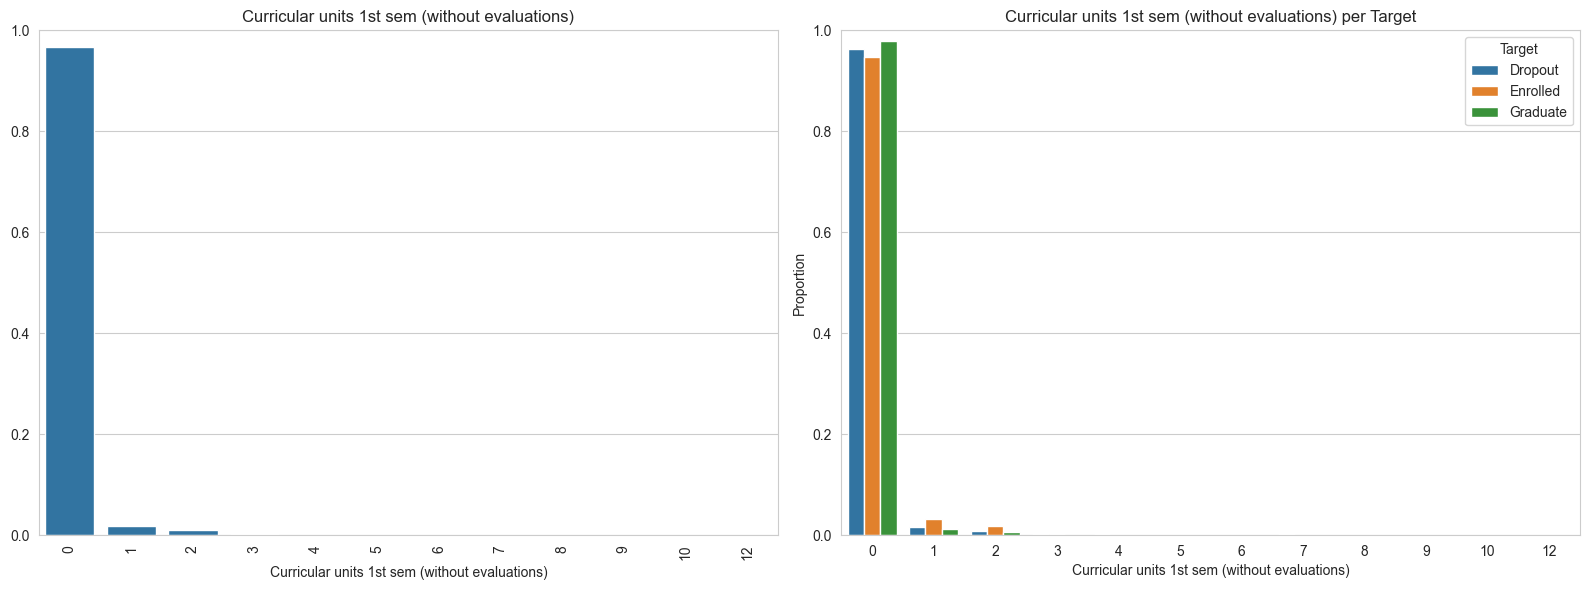

Curricular units 2nd sem (credited)


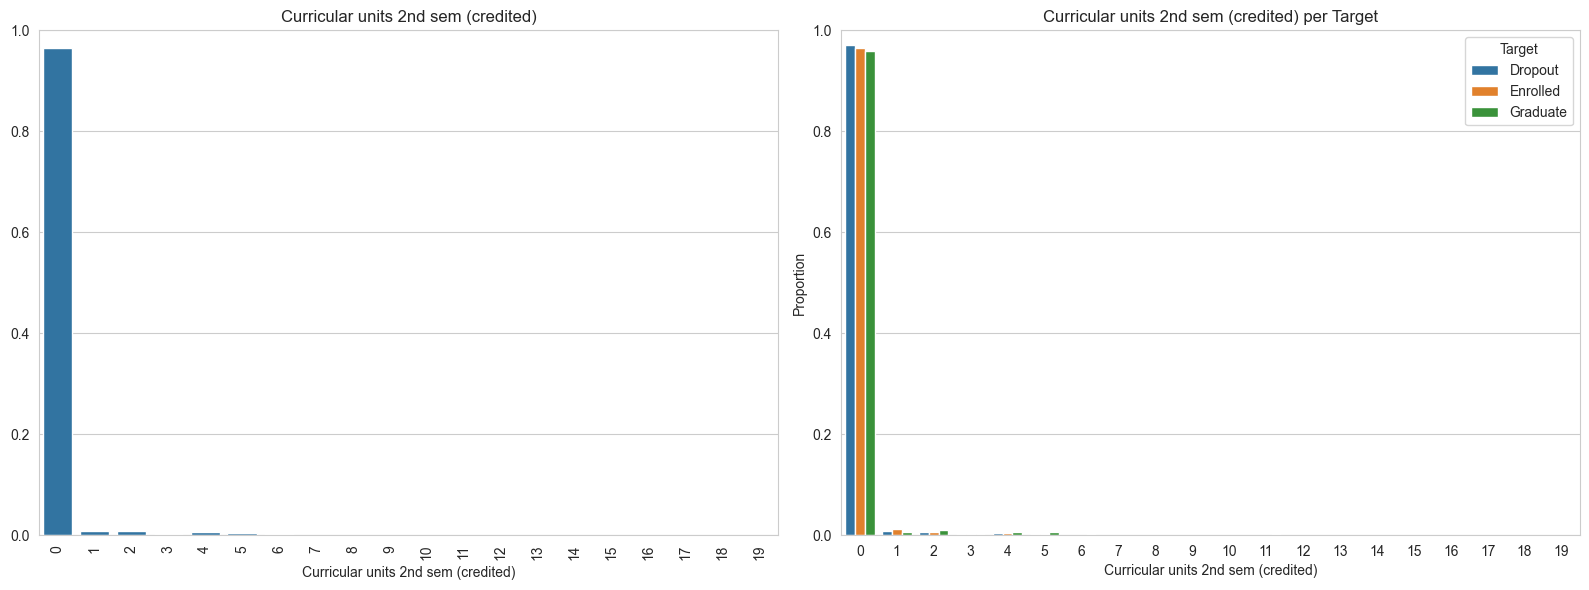

Curricular units 2nd sem (enrolled)


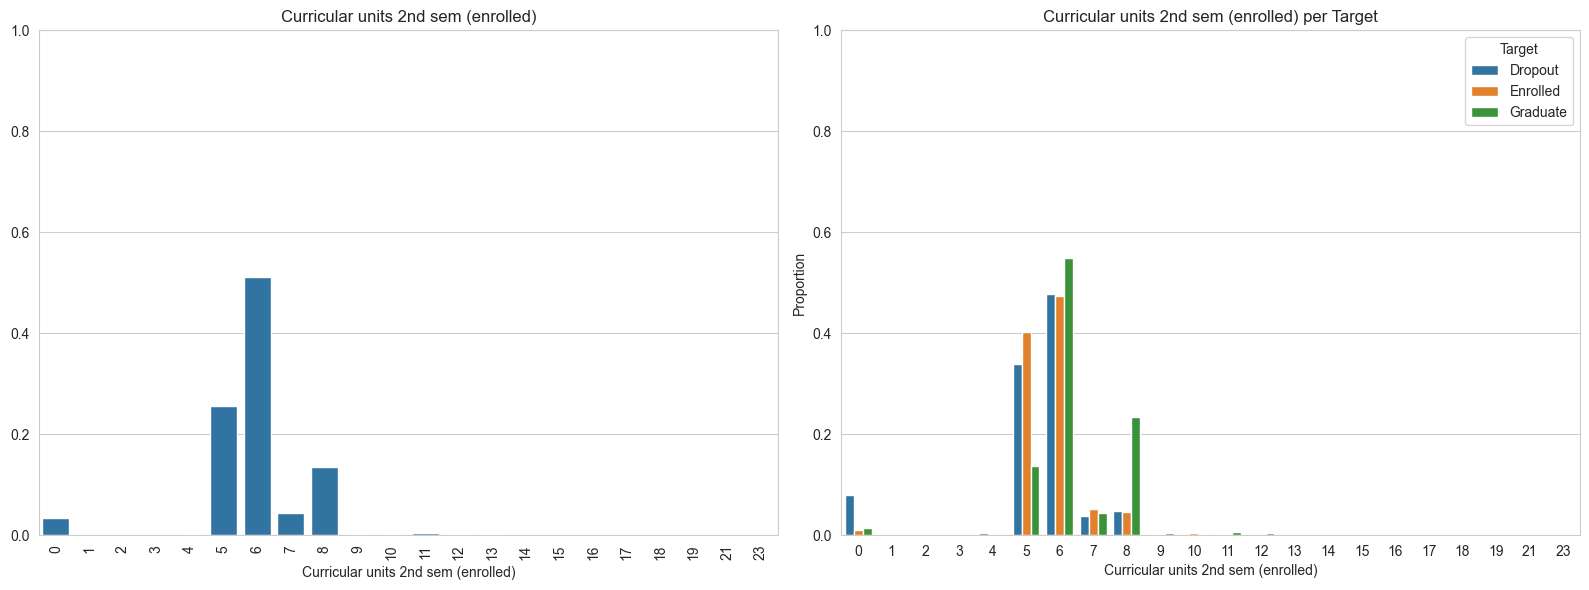

Curricular units 2nd sem (evaluations)


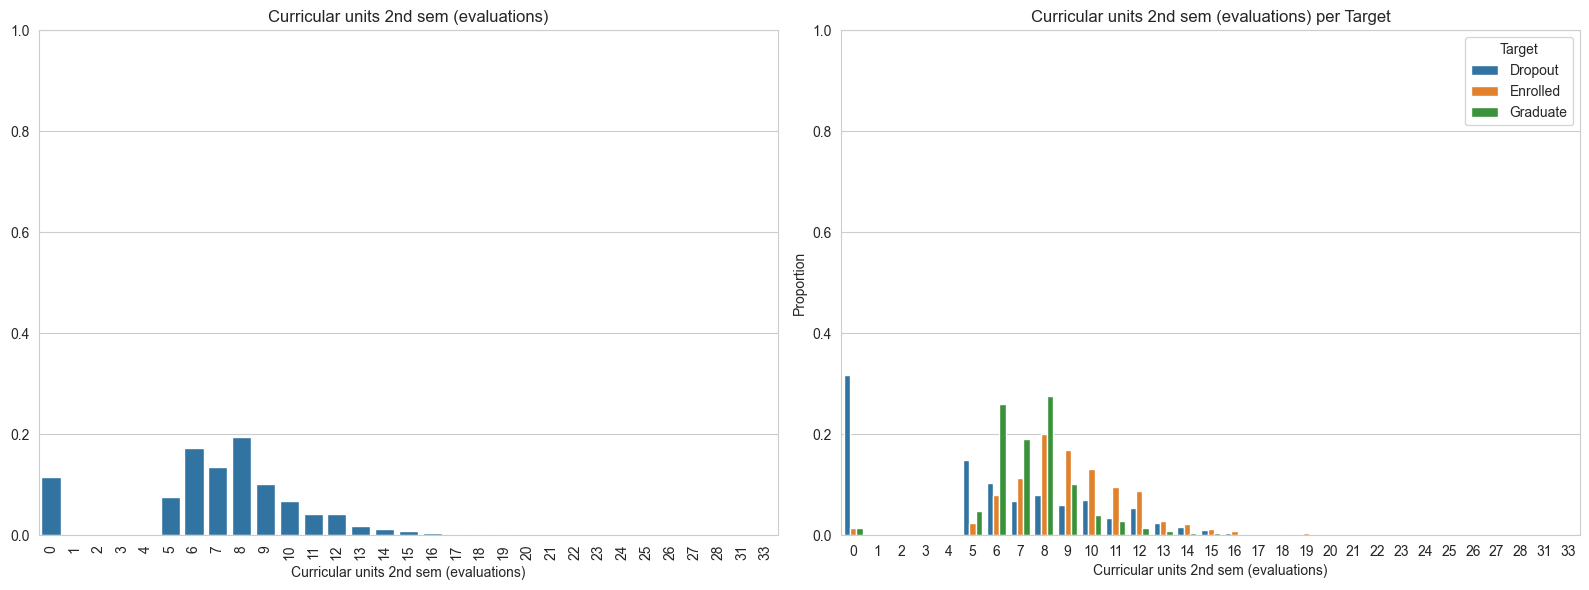

Curricular units 2nd sem (approved)


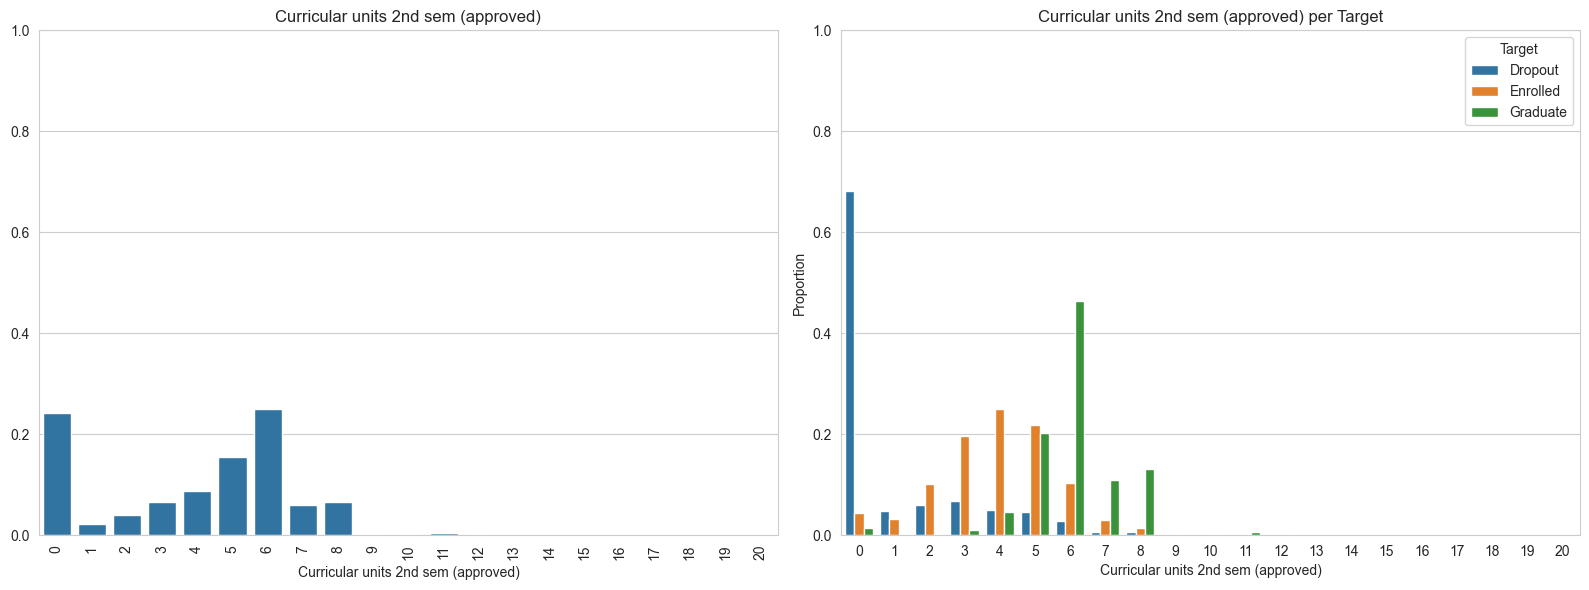

Curricular units 2nd sem (without evaluations)


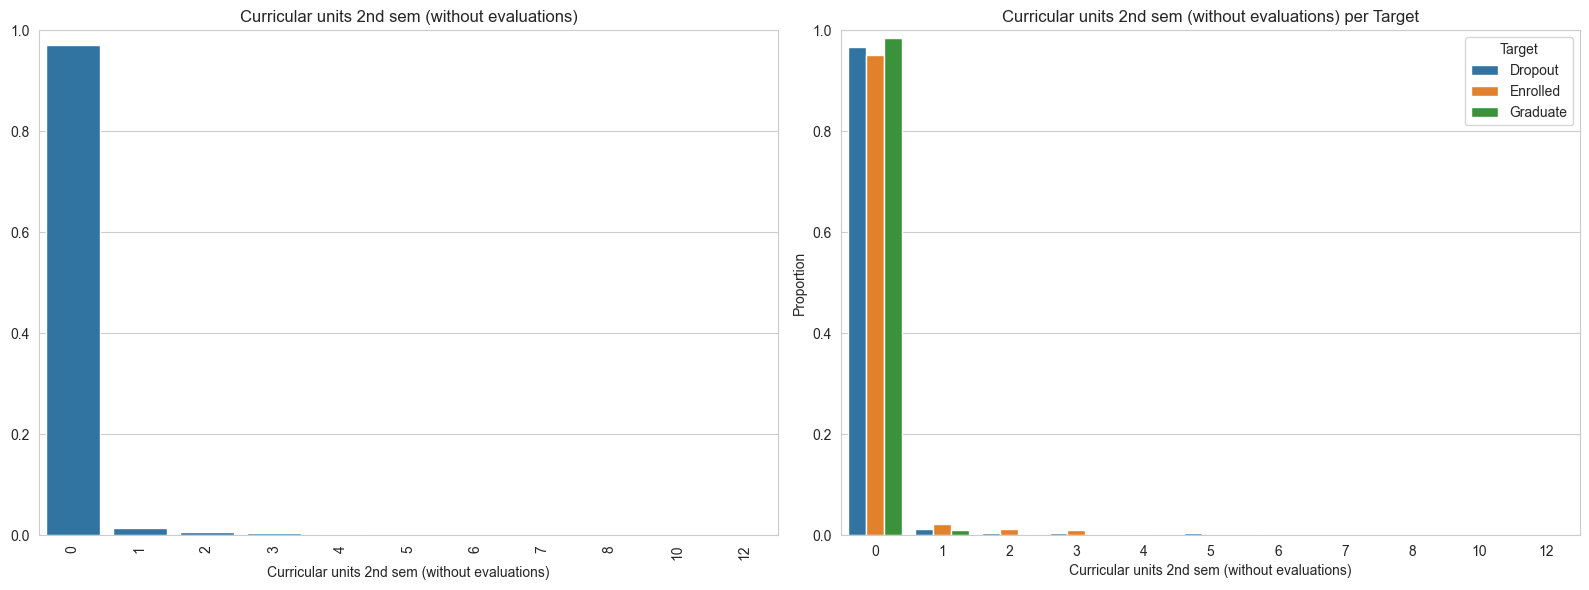

In [21]:
for column in categorical_columns:
    print(column)

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    ratios = train_df[column].value_counts(normalize=True)
    sns.barplot(ax=axes[0], x=ratios.index, y=ratios.to_list())
    axes[0].set_title(column)
    axes[0].tick_params(axis="x", labelrotation=90)
    axes[0].set_ylim(0, 1)

    grouped_counts = train_df.groupby("Target")[column].value_counts(normalize=True)
    flattened_df = grouped_counts.reset_index()
    flattened_df.columns = ["Target", column, "Proportion"]
    sns.barplot(
        x=flattened_df[column], y=flattened_df["Proportion"], hue=flattened_df["Target"]
    )
    axes[1].set_title(f"{column} per Target")
    axes[0].tick_params(axis="x", labelrotation=90)
    axes[1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Drop unneeded columns, like id

In [22]:
columns_to_drop = ["id"]
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

# Handling class imbalance

In [23]:
normalized_proportions = train_df["Target"].value_counts(normalize=True)
normalized_proportions

Target
Graduate    0.474163
Dropout     0.330589
Enrolled    0.195248
Name: proportion, dtype: float64

There is imbalance

In [24]:
# Define Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier

over = SMOTE(sampling_strategy="auto", random_state=random_state)
model = RandomForestClassifier(random_state=random_state)

pipeline = ImbPipeline(steps=[("over", over), ("model", model)])

X = train_df.drop(columns="Target")
y = train_df["Target"]

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {"model__n_estimators" : [5],
              "model__criterion" : ["gini", "entropy"],
              "model__max_depth" : [3]}

grid_search = GridSearchCV(estimator= pipeline,
                       param_grid = param_grid,
                       scoring= "accuracy",
                       cv=5)

X_train = train_df.drop(columns="Target")
y_train = train_df["Target"]

grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


X_test = test_df.drop(columns="Target")
y_test = test_df["Target"]

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", test_accuracy)

Best parameters found:  {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__n_estimators': 5}
Best accuracy:  0.7816330783788658


KeyError: "['Target'] not found in axis"